In [1]:
# other package imports
import matplotlib.pyplot as plt  # keep this import for CI to work
from zanj import ZANJ  # saving/loading data
from muutils.mlutils import pprint_summary  # pretty printing as json

# maze_dataset imports
from maze_dataset import LatticeMaze, SolvedMaze, MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators, GENERATORS_MAP
from maze_dataset.generation.default_generators import DEFAULT_GENERATORS
from maze_dataset.dataset.configs import MAZE_DATASET_CONFIGS
from maze_dataset.plotting import plot_dataset_mazes, print_dataset_mazes, MazePlot

# check the configs
print(MAZE_DATASET_CONFIGS.keys())
# for saving/loading things
LOCAL_DATA_PATH: str = "../data/maze_dataset/"
zanj: ZANJ = ZANJ(external_list_threshold=256)

dict_keys(['test-g3-n5-a_dfs-h75556', 'demo_small-g3-n100-a_dfs-h88371', 'demo-g6-n10K-a_dfs-h30615'])


In [2]:
# magic autoreload
%load_ext autoreload
%autoreload 2

In [48]:
cfg: MazeDatasetConfig = MazeDatasetConfig(
    name="test",  # name is only for you to keep track of things
    grid_n=5,  # number of rows/columns in the lattice
    n_mazes=4,  # number of mazes to generate
    maze_ctor=LatticeMazeGenerators.gen_dfs,  # algorithm to generate the maze
)

# each config will use this function to get the name of the dataset
# it contains some basic info about the algorithm, size, and number of mazes
# at the end after "h" is a stable hash of the config to avoid collisions
print(cfg.to_fname())

test-g5-n4-a_dfs-h84708


In [49]:
data = MazeDataset.from_config(cfg)
maze = data[0]

###########
#    XXX# #
# ###X#X# #
#   #X#S  #
#####X#####
#XXXXX#EXX#
#X### ###X#
#X#     #X#
#X#######X#
#XXXXXXXXX#
###########


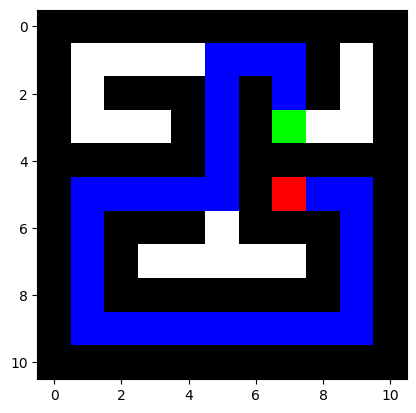

In [50]:
print(maze.as_ascii())
plt.imshow(maze.as_pixels())

In [51]:
fork_idxs, fork_coords = maze.get_solution_forking_points()
follow_idxs, follow_coords = maze.get_solution_path_following_points()

print(
    dict(
        fork_idxs=fork_idxs,
        fork_coords=fork_coords.tolist(),
        follow_idxs=follow_idxs,
        follow_coords=follow_coords.tolist(),
    )
)

{'fork_idxs': [0, 2, 4], 'fork_coords': [[1, 3], [0, 2], [2, 2]], 'follow_idxs': array([ 1,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'follow_coords': [[0, 3], [1, 2], [2, 1], [2, 0], [3, 0], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [3, 4], [2, 4], [2, 3]]}


[(array([1, 3]), {'marker': 's', 'color': 'green'}), (array([0, 2]), {'marker': 's', 'color': 'green'}), (array([2, 2]), {'marker': 's', 'color': 'green'}), (array([0, 3]), {'marker': '+', 'color': 'blue'}), (array([1, 2]), {'marker': '+', 'color': 'blue'}), (array([2, 1]), {'marker': '+', 'color': 'blue'}), (array([2, 0]), {'marker': '+', 'color': 'blue'}), (array([3, 0]), {'marker': '+', 'color': 'blue'}), (array([4, 0]), {'marker': '+', 'color': 'blue'}), (array([4, 1]), {'marker': '+', 'color': 'blue'}), (array([4, 2]), {'marker': '+', 'color': 'blue'}), (array([4, 3]), {'marker': '+', 'color': 'blue'}), (array([4, 4]), {'marker': '+', 'color': 'blue'}), (array([3, 4]), {'marker': '+', 'color': 'blue'}), (array([2, 4]), {'marker': '+', 'color': 'blue'}), (array([2, 3]), {'marker': '+', 'color': 'blue'})]


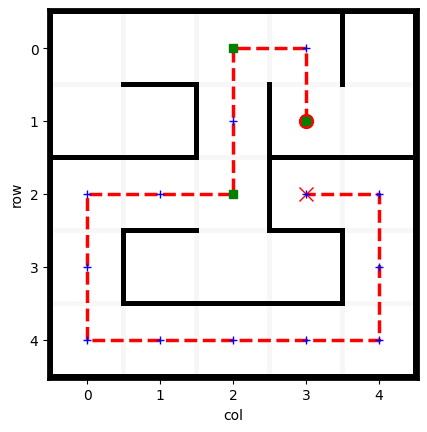

In [52]:
mp: MazePlot = MazePlot(maze)
mp.mark_coords(fork_coords, color="green", marker="s")
mp.mark_coords(follow_coords)
print(mp.marked_coords)
mp.plot()